In [93]:

import pandas as pd
data=pd.read_csv("C:\\Users\\arjun\\Desktop\\allprices\\crypto-markets.csv")
data=data[data['slug']=='namecoin']
df=data


In [94]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
df=pd.read_csv("C:\\Users\\arjun\\Desktop\\namecoin.csv")
from numpy import savetxt

In [95]:
dates=df[['date']]
df = df[['close']]


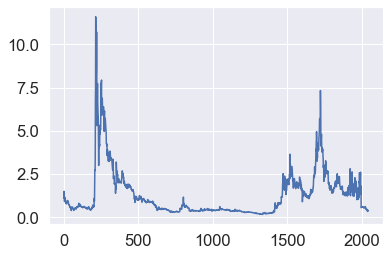

In [55]:
plt.plot(df.close)

In [56]:
data = []
for i in df['close']:
  if(i<=10):
    data.append(i)
hist = []
target = []
length = 30
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)


In [57]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [21]:
hist_scaled = hist.reshape((len(hist), length, 1))
print(hist_scaled.shape)


(2008, 30, 1)


In [22]:
X_train = hist_scaled[:1950,:,:]

X_test = hist_scaled[1950:,:,:]
y_train = target[:1950,:]
y_test = target[1950:,:]

In [72]:
x_test_dates=list(dates[1950:])

In [80]:
#plt.xticks(x_test_dates,y_test)x


In [23]:
newmodel = tf.keras.Sequential()
newmodel.add(layers.LSTM(units=64, return_sequences= True, input_shape=(X_train.shape[1],1)))
newmodel.add(layers.LSTM(units=64, return_sequences=True))
newmodel.add(layers.LSTM(units=64, return_sequences=True))
newmodel.add(layers.Dropout(0.2))
newmodel.add(layers.LSTM(units=64))
newmodel.add(layers.Dropout(0.2))

newmodel.add(layers.Dense(units=1))
newmodel.summary()
newmodel.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 64)            16896     
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 64)            33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [24]:
history = newmodel.fit(X_train, y_train, epochs=20, batch_size=16)

Train on 1950 samples
Epoch 1/20
1950/1950 [==============================] - 10s 5ms/sample - loss: 0.5797
Epoch 2/20
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.2075
Epoch 3/20
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.1578
Epoch 4/20
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.1517
Epoch 5/20
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.1121 0s - 
Epoch 6/20
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.1172
Epoch 7/20
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0908
Epoch 8/20
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0882
Epoch 9/20
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0829
Epoch 10/20
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0782
Epoch 11/20
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0730
Epoch 12/20
1950/1950 [===========

ConversionError: Failed to convert value(s) to axis units:             date
1950  2018-08-30
1951  2018-08-31
1952  2018-09-01
1953  2018-09-02
1954  2018-09-03
1955  2018-09-04
1956  2018-09-05
1957  2018-09-06
1958  2018-09-07
1959  2018-09-08
1960  2018-09-09
1961  2018-09-10
1962  2018-09-11
1963  2018-09-12
1964  2018-09-13
1965  2018-09-14
1966  2018-09-15
1967  2018-09-16
1968  2018-09-17
1969  2018-09-18
1970  2018-09-19
1971  2018-09-20
1972  2018-09-21
1973  2018-09-22
1974  2018-09-23
1975  2018-09-24
1976  2018-09-25
1977  2018-09-26
1978  2018-09-27
1979  2018-09-28
...          ...
2012  2018-10-31
2013  2018-11-01
2014  2018-11-02
2015  2018-11-03
2016  2018-11-04
2017  2018-11-05
2018  2018-11-06
2019  2018-11-07
2020  2018-11-08
2021  2018-11-09
2022  2018-11-10
2023  2018-11-11
2024  2018-11-12
2025  2018-11-13
2026  2018-11-14
2027  2018-11-15
2028  2018-11-16
2029  2018-11-17
2030  2018-11-18
2031  2018-11-19
2032  2018-11-20
2033  2018-11-21
2034  2018-11-22
2035  2018-11-23
2036  2018-11-24
2037  2018-11-25
2038  2018-11-26
2039  2018-11-27
2040  2018-11-28
2041  2018-11-29

[92 rows x 1 columns]

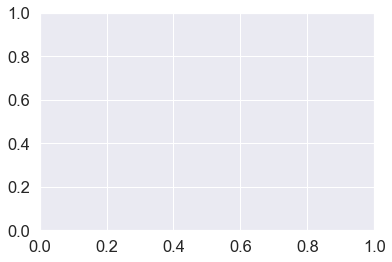

In [63]:
pred = newmodel.predict(X_test)
plt.xticks(x_test_dates,y_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Namecoin Price Prediction')
plt.legend()
plt.show()

In [27]:
y_test.shape

(58, 1)

In [28]:
history = newmodel.fit(X_train, y_train, epochs=10, batch_size=16)

Train on 1950 samples
Epoch 1/10
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0656
Epoch 2/10
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0654
Epoch 3/10
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0748
Epoch 4/10
1950/1950 [==============================] - 6s 3ms/sample - loss: 0.0686
Epoch 5/10
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0623
Epoch 6/10
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0662
Epoch 7/10
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0678
Epoch 8/10
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0683
Epoch 9/10
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0666
Epoch 10/10
1950/1950 [==============================] - 5s 3ms/sample - loss: 0.0674


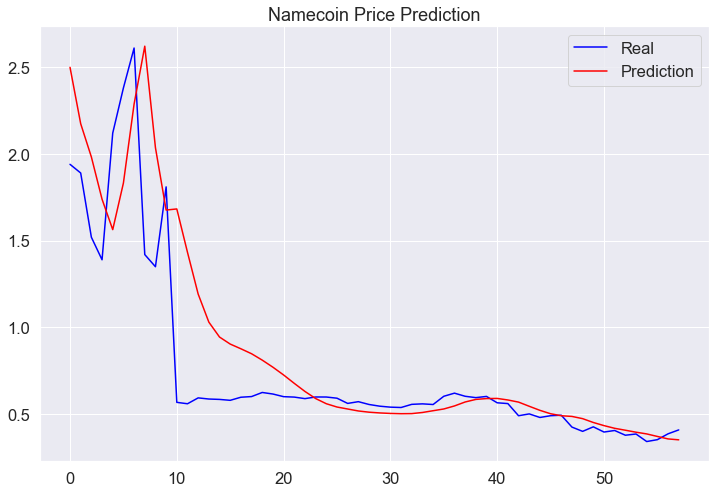

In [29]:
pred = newmodel.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Namecoin Price Prediction')
plt.legend()
plt.show()

In [34]:
newmodel.save("namecoin.h5")

In [85]:
y_test.shape
savetxt("testing_values_namecoin.txt",y_test)

In [86]:
loadarray=X_test.reshape(X_test.shape[0],-1)

In [87]:
savetxt("need_data_namecoin.txt",loadarray)

In [88]:
loadarray.shape

(58, 30)

array([[1.94    ],
       [1.89    ],
       [1.52    ],
       [1.39    ],
       [2.12    ],
       [2.38    ],
       [2.61    ],
       [1.42    ],
       [1.35    ],
       [1.81    ],
       [0.568599],
       [0.560488],
       [0.594337],
       [0.587757],
       [0.585519],
       [0.580281],
       [0.598078],
       [0.601924],
       [0.62552 ],
       [0.616541],
       [0.601369],
       [0.598858],
       [0.590066],
       [0.59951 ],
       [0.599316],
       [0.592519],
       [0.562454],
       [0.572535],
       [0.556314],
       [0.546545],
       [0.540952],
       [0.538934],
       [0.557108],
       [0.559882],
       [0.556124],
       [0.603566],
       [0.6216  ],
       [0.603593],
       [0.595762],
       [0.602748],
       [0.566029],
       [0.561513],
       [0.491447],
       [0.502057],
       [0.481544],
       [0.491578],
       [0.494499],
       [0.426081],
       [0.401463],
       [0.427516],
       [0.397526],
       [0.406447],
       [0.37

In [91]:
dfdat

,close
0,1.110000
1,1.330000
2,1.500000
3,1.210000
4,1.070000
5,0.915918
6,1.060000
7,1.150000
8,0.982625
9,0.957785


In [92]:
data

[1.11,
 1.33,
 1.5,
 1.21,
 1.07,
 0.915918,
 1.06,
 1.15,
 0.982625,
 0.957785,
 0.946001,
 0.938541,
 0.986824,
 0.8332069999999999,
 0.8464,
 0.894287,
 0.801685,
 0.7835489999999999,
 0.799255,
 0.7983680000000001,
 0.8138529999999999,
 0.85759,
 0.8698600000000001,
 0.867533,
 0.888284,
 0.928711,
 0.973692,
 0.951576,
 0.930356,
 0.888753,
 0.89784,
 0.8506889999999999,
 0.757338,
 0.74433,
 0.7499399999999999,
 0.709295,
 0.727222,
 0.720021,
 0.697055,
 0.6667,
 0.6310899999999999,
 0.6151439999999999,
 0.5760000000000001,
 0.5955600000000001,
 0.5749920000000001,
 0.54832,
 0.5096,
 0.469901,
 0.404952,
 0.3950550000000001,
 0.39663,
 0.40812,
 0.591047,
 0.561765,
 0.533265,
 0.565326,
 0.5627479999999999,
 0.5784100000000001,
 0.592515,
 0.5876,
 0.5660189999999999,
 0.510159,
 0.5082180000000001,
 0.5014270000000001,
 0.466665,
 0.473204,
 0.423314,
 0.461413,
 0.438643,
 0.465236,
 0.436928,
 0.444558,
 0.4486600000000001,
 0.472842,
 0.5071859999999999,
 0.529747000000000

In [99]:
dates.iloc[1950:]

,date
1950,2018-08-30
1951,2018-08-31
1952,2018-09-01
1953,2018-09-02
1954,2018-09-03
1955,2018-09-04
1956,2018-09-05
1957,2018-09-06
1958,2018-09-07
1959,2018-09-08
